## importing library

In [1]:

import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# pip install wordcloud
#pip install NLTK

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Reading word file

In [4]:
#pip install python-docx 

In [5]:
from docx import Document
def getText(filename):
    doc = Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)


In [6]:
file=r'C:\Users\Admin\Downloads\shivam.docx'
#text = open('file.txt', 'r').read()
text=getText(file)
type(text)

str

## Creating and adding stopwords

In [7]:
l=stopwords.words('english')
STOPWORDS.update(l)
STOPWORDS.update(['using', 'used','To','to','TO','Description','Description:','Used','Used:','●'])
STOPWORDS

{'Description',
 'Description:',
 'TO',
 'To',
 'Used',
 'Used:',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'll'

# tokenizing and symbol removal

In [8]:

word_tokens = word_tokenize(text) 
tex = [w for w in word_tokens if not w in STOPWORDS] 
textswithsymbol=str(tex)
texts=re.sub(r'[^\w]', ' ',textswithsymbol)# REMOVING SYMBOL
print(texts) 

  Objective    Dedicated         passionate         competent    Data    Scientist    hands on    experience    Python         R    well    building    complicated    neural    networks         Capable    recognizing    patterns         interpreting    data    Excellent    analytical    skills         Work    History    2018 05         2020 06    Associate    Software    Engineer    Working    In    Accenture         Pune    Trained    Python    Worked    keras         tensor    flow    scikit    learn    Hands    MYSQL         SYBASE         Mongo    db    database    Experience    CNN    model    training    development    Developed    python    script    augmentation    Random    forest    model    training    scikit    learn    Education    2019 08         2020 02    PG    Diploma         Artificial    Intelligence    CDAC    ACTS         Pune    6    month    post    graduate    diploma    course    Artificial    intelligence    provided    900    hours    deep    insights    Mach

## Loading image

In [9]:
img=Image.open('black.jpg')
custom_mask = np.array(img) 


## Creating Cloud

In [10]:

wc = WordCloud(background_color = 'white',
               stopwords = STOPWORDS,
               mask = custom_mask,
               contour_width = 21,
               contour_color = 'black')


## Generating Cloud

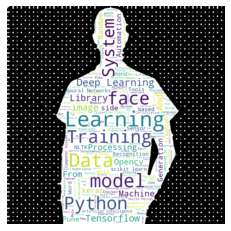

In [11]:

wc.generate(texts)
image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)


wc.to_file('my_wordcloud.png')

#Plotting
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Generating Cloud for high count words only (AS A SUMMARIZER)

In [12]:
#from collections import Counter  
words = texts.split(' ')
#result = dict(Counter(words))
result = {i:words.count(i) for i in set(words)}
d={k:v for (k,v) in result.items() if v > 2}
d
l=str(list(d.keys()))
l

"['', 'Networks', '2018', 'Tools', 'And', 'face', 'Training', 'Generation', 'In', 'model', 'R', 'Artificial', 'From', 'learn', 'E', 'Sensor', 'Deep', 'scikit', 'Learning', 'I', 'Opencv', 'Secured', 'Processing', 'B', 'Random', 'deep', 'Library', 'training', 'Pune', 'System', 'Machine', 'data', 'learning', 'Face', 'image', 'Tensorflow', 'Python', 'Data']"

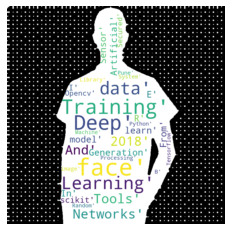

In [13]:
wc.generate(l)

#Plotting
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()